AIRBNB DATASET EDA and BASIC PREDICTION MODEL STARTER CODE

Let's have a look at this open dataset provided by AirBnB. We will resume will exploratory Analysis for the Dataset. 

In [103]:
import numpy as np                 
import pandas as pd               
import matplotlib                 
import matplotlib.pyplot as plt
import seaborn as sns           
plt.style.use('fivethirtyeight')
%matplotlib inline
import plotly as plotly                
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import folium
from folium.plugins import HeatMap
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [12]:
df = pd.read_csv('AB_NYC_2019.csv')

In [69]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Checking if there exists any null/Nan values in the given columns

In [15]:
df.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

Calculating the percentage of null values for columns containing null values 

In [17]:
empty_col_list = ['name', 'host_name', 'last_review', 'reviews_per_month']
for i in empty_col_list: 
    print('Percentage of null rows in column', i ,':', sum(pd.isnull(df[i]))/df.shape[0] * 100)

Percentage of null rows in column name : 0.03272318232948154
Percentage of null rows in column host_name : 0.04294917680744453
Percentage of null rows in column last_review : 20.55833929849678
Percentage of null rows in column reviews_per_month : 20.55833929849678


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Mean price -> $153 (for a room in New York)

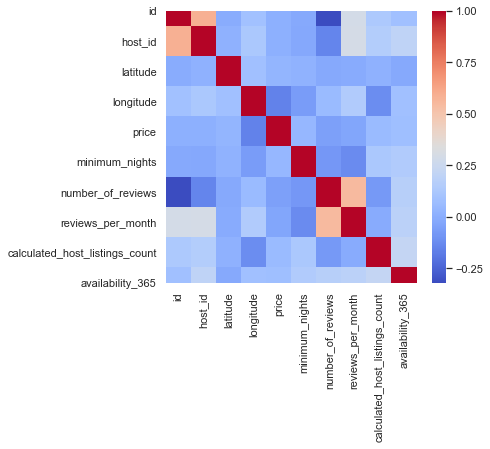

In [36]:
sns.heatmap(df.corr(), cmap='coolwarm')
sns.set(rc={'figure.figsize':(10,10)}, font_scale=1)

In [22]:
df.corr().style.background_gradient(cmap='coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1,0.58829,-0.00312529,0.0909085,0.0106187,-0.0132245,-0.31976,0.291828,0.133272,0.0854676
host_id,0.58829,1,0.0202242,0.127055,0.0153091,-0.0173643,-0.140106,0.296417,0.15495,0.203492
latitude,-0.00312529,0.0202242,1,0.0847884,0.0339387,0.0248693,-0.0153888,-0.0101416,0.0195174,-0.0109835
longitude,0.0909085,0.127055,0.0847884,1,-0.150019,-0.0627471,0.0590943,0.145948,-0.114713,0.0827307
price,0.0106187,0.0153091,0.0339387,-0.150019,1,0.0427993,-0.0479542,-0.0306083,0.0574717,0.0818288
minimum_nights,-0.0132245,-0.0173643,0.0248693,-0.0627471,0.0427993,1,-0.0801161,-0.121702,0.12796,0.144303
number_of_reviews,-0.31976,-0.140106,-0.0153888,0.0590943,-0.0479542,-0.0801161,1,0.549868,-0.0723761,0.172028
reviews_per_month,0.291828,0.296417,-0.0101416,0.145948,-0.0306083,-0.121702,0.549868,1,-0.00942116,0.185791
calculated_host_listings_count,0.133272,0.15495,0.0195174,-0.114713,0.0574717,0.12796,-0.0723761,-0.00942116,1,0.225701
availability_365,0.0854676,0.203492,-0.0109835,0.0827307,0.0818288,0.144303,0.172028,0.185791,0.225701,1


No strong correlations except for reviews_per_month and last_review both of which contains significant amount of null values

In [ ]:
Neighbourhood Distribution visualization using pie chart

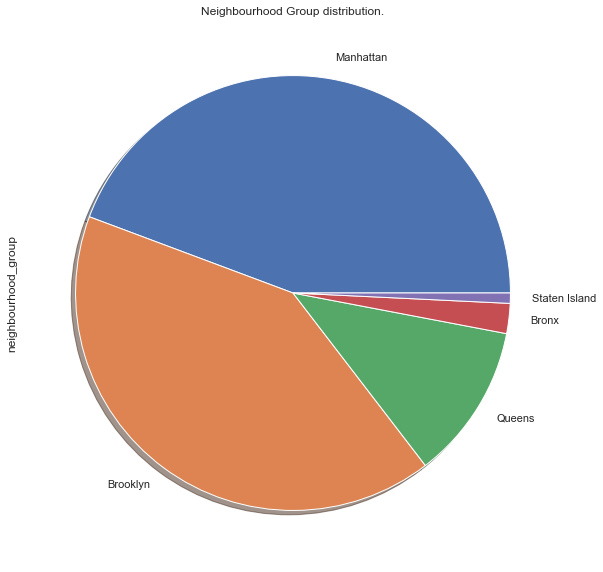

In [40]:
df['neighbourhood_group'].value_counts().plot.pie(shadow=True)
plt.title('Neighbourhood Group distribution.')
plt.show()

Longitude v Latitude Scatter plot for Neighbourhood group

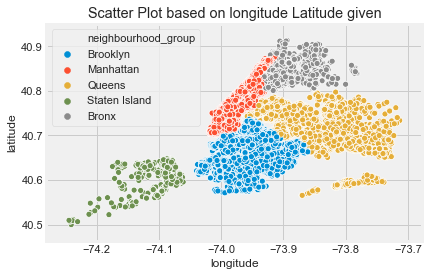

In [132]:
sns.scatterplot(df['longitude'],df['latitude'],hue=df['neighbourhood_group'])
plt.title('Scatter Plot based on longitude Latitude given')
plt.show()

Checking price distribution for neighbourhood groups

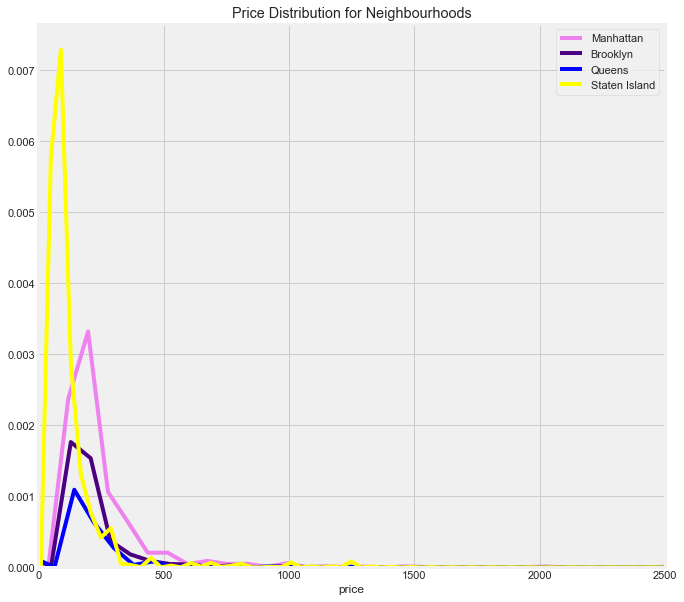

In [55]:
plt.figure(figsize=(10,10))
sns.distplot(df[df.neighbourhood_group=='Manhattan'].price,color='violet',hist=False,label='Manhattan')
sns.distplot(df[df.neighbourhood_group=='Brooklyn'].price,color='indigo',hist=False,label='Brooklyn')
sns.distplot(df[df.neighbourhood_group=='Queens'].price,color='blue',hist=False,label='Queens')
sns.distplot(df[df.neighbourhood_group=='Staten Island'].price,color='yellow',hist=False,label='Staten Island')
sns.distplot(df[df.neighbourhood_group=='Long Island'].price,color='green',hist=False,label='Long Island')
plt.title('Price Distribution for Neighbourhoods')
plt.xlim(0,2500)
plt.show()

In [52]:
nycmap=folium.Map([40.7128, -74.0060],zoom_start=10.5)
HeatMap(df[['latitude','longitude']].dropna(),radius=7,gradient={0.125:'blue',0.250:'purple',0.5:'yellow',0.75:'orange',1.0:'red'}).add_to(nycmap)
display(nycmap)

#heatmap added in repo as heatmap_ss.png

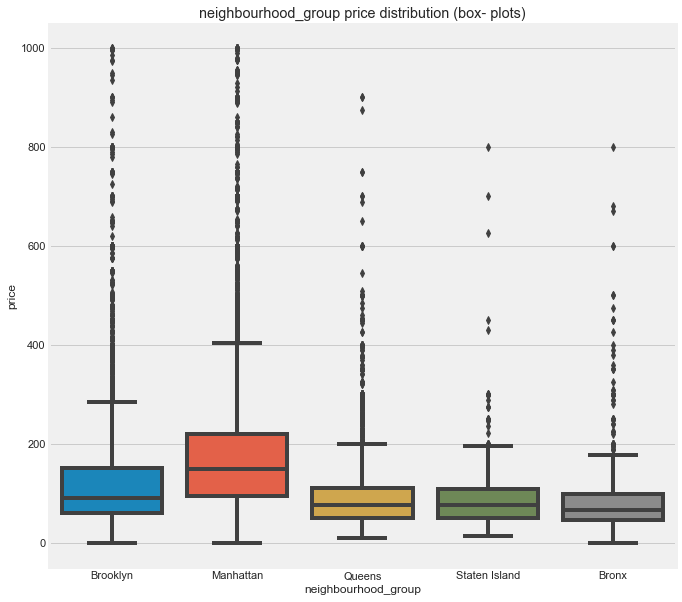

In [57]:
boxnyc=df[df['price']<1000]
plt.figure(figsize=(10,10))
sns.boxplot(y='price',x='neighbourhood_group',data=boxnyc)
plt.title("neighbourhood_group price distribution (box- plots)")
plt.show()

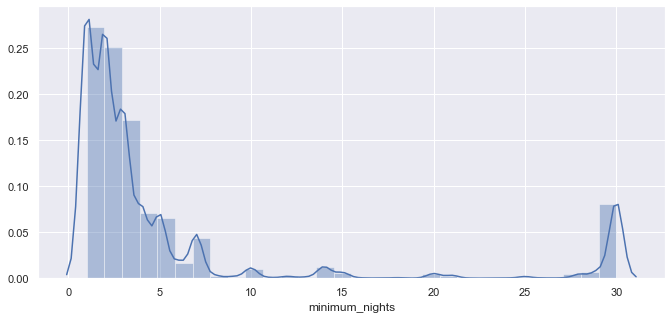

In [64]:
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=30)
sns.set(rc={'figure.figsize':(5,10)}, font_scale=1)

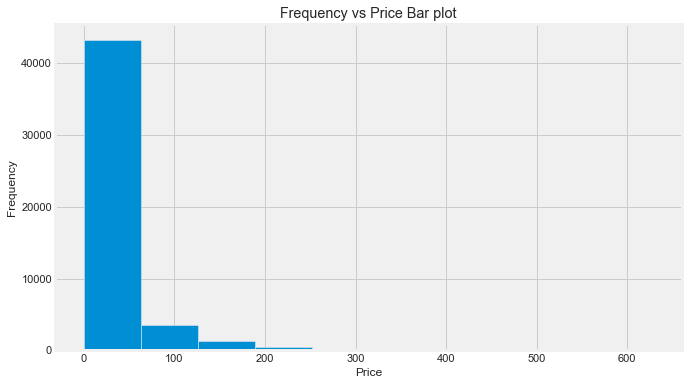

In [133]:
plt.figure(figsize=(10,6))
df['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.title('Frequency vs Price Bar plot')
plt.show()

In [124]:
df_neigh = df.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price').reset_index()

Neighbourhoods with the least and most expensove rooms

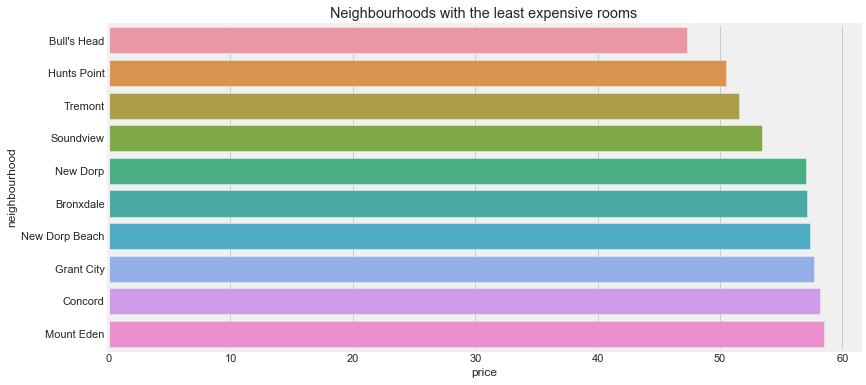

In [130]:
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=df_neigh.head(10))
plt.title('Neighbourhoods with the least expensive rooms')
plt.show()

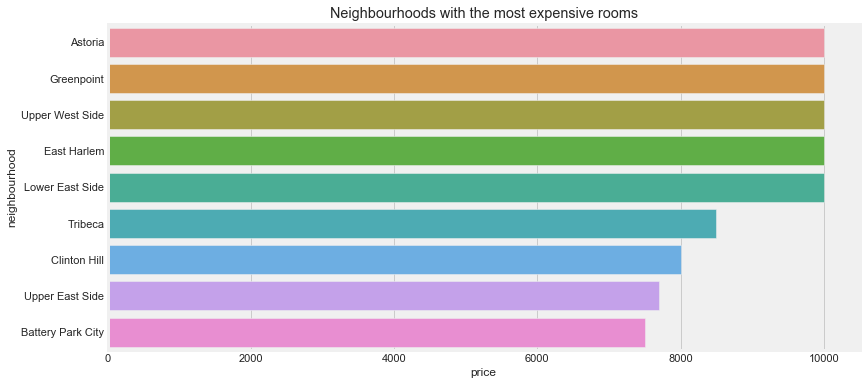

In [131]:
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=df.nlargest(10,['price']))
plt.title('Neighbourhoods with the most expensive rooms')
plt.show()

Text(0.5, 1.0, 'Scatter plot for room availability')

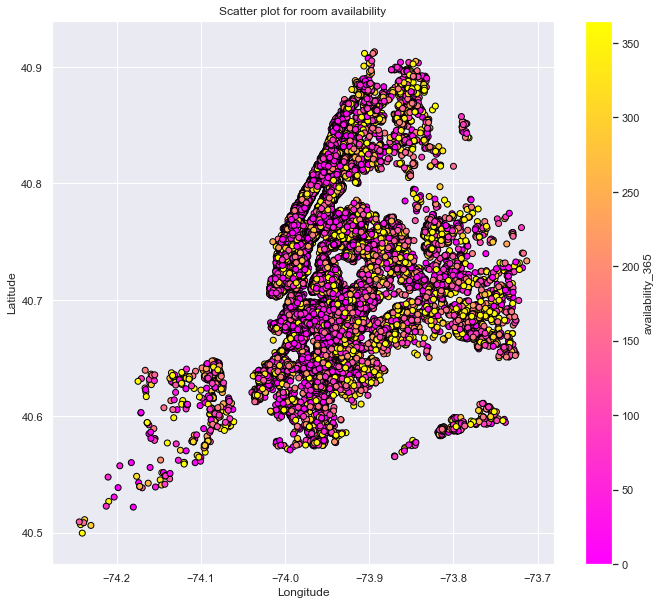

In [68]:
plt.figure(figsize=(10,10))
plt.scatter(df['longitude'], df['latitude'], c=df['availability_365'], cmap='spring', edgecolor='black')
bar=plt.colorbar()
bar.set_label('availability_365')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot for room availability')

In [97]:
le = LabelEncoder()
df_reg = df.drop(['id', 'name', 'host_name', 'last_review'], axis = 1)
df_reg['reviews_per_month']=df_reg['reviews_per_month'].replace(np.nan, 0)

In [98]:
df_reg.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [99]:
col_list = ['neighbourhood_group', 'neighbourhood', 'room_type']

for i in col_list:
    df_reg[i] = le.fit_transform(df_reg[i])

Trying out some Regression Models (Linear Regression and Decision Tree Regression)

These prediction models predict prices based on the given information

In [100]:
lr = LinearRegression()
X = df_reg[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365', 'host_id']]
y = df_reg['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
predictions = lr.predict(X_test)

print('Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 Score: ', r2_score(y_test,predictions) * 100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,predictions))

Mean Squared Error:  198.4027116282946
R2 Score:  11.018978517406165
Mean Absolute Error:  71.97981544193615


In [119]:
regr = DecisionTreeRegressor(max_depth=6)
regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [120]:
predictions_rt = regr.predict(X_test)

print('Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,predictions_rt)))
print('R2 Score: ', r2_score(y_test,predictions_rt) * 100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,predictions_rt))

Mean Squared Error:  205.5353255772438
R2 Score:  4.506209893331281
Mean Absolute Error:  65.86854829912134


A lot more work can be done on these regression models, this is by no means a complete code for the model. 